In [32]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x,w,b):
    # bias b controls from which value the slope can atually start to change
    # weight w controls the slope of the line
    return 1/(1 + np.e**(-x*w - b))

def rbf(x,c,h):
    return np.e**(-((x-c)/h)**2)

def rbf_design_matrix(XX):
    col1 = rbf(XX,-6,1)
    col2 = rbf(XX,-3,1)
    col3 = rbf(XX,3,1)
    col4 = rbf(XX,6,1)
    col5 = rbf(XX,0,1)

    return np.concatenate((col1,col2,col3,col4,col5),axis=1)

def sigmoid_design_matrix(XX):
    col1 = sigmoid(XX,2,-4)
    col2 = sigmoid(XX,0.1,0)
    
    col3 = sigmoid(XX,1,6)
    col4 = sigmoid(XX,0.5,3)
    col5 = sigmoid(XX,1,0)

    return np.concatenate((col1,col3,col4,col5),axis=1)
    
def fit_lnsq(x,y):
    return np.linalg.lstsq(x,y,rcond=None)[0]

def solve_equation(x,y):
    return np.linalg.solve(x,y)

def print_results(ax,y,x,w,points):
    pred = np.dot(x,w)
    xaxis = np.arange(-points/4,points/4,0.5).reshape(points,1)
    ax.scatter(xaxis,y)
    ax.plot(xaxis,pred)
    pass


In [33]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

data = np.arange(-6,6,0.5).reshape(24,1)
broader = np.arange(-12,12,0.5).reshape(48,1)

targets = np.cos(data)
design = rbf_design_matrix(data)
res = fit_lnsq(design,targets)
print_results(ax1,targets,design,res,24)

design_sig = sigmoid_design_matrix(data)
res = fit_lnsq(design_sig,targets)
print(res)

data = np.arange(-6,6,0.5).reshape(24,1)

print_results(ax2,targets,design_sig,res,24)

[[ -1.01542707]
 [-15.9301954 ]
 [ 18.05949799]
 [ -1.45298606]]


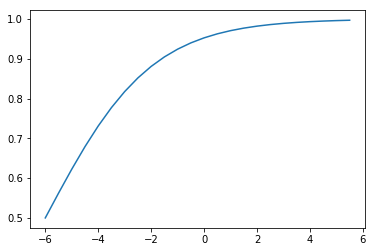

In [356]:
broader = np.arange(-6,6,0.5).reshape(24,1)
sig = sigmoid(broader,0.5,3)
plt.plot(broader,sig)
plt.show()

## Gaussian Models & CLT

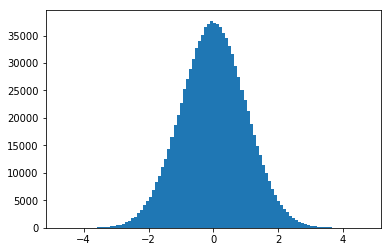

empirical_mean = 0.00174801
empirical_var = 0.999908


In [376]:
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

N = int(1e6) # 1e6 is a float, numpy wants int arguments
xx = np.random.randn(N)
hist_stuff = plt.hist(xx, bins=100)
plt.show()
print('empirical_mean = %g' % np.mean(xx)) # or xx.mean()
print('empirical_var = %g' % np.var(xx))   # or xx.var()
mean = np.mean(xx)
var = np.var(xx)

In [379]:
bin_centres = 0.5*(hist_stuff[1][1:] + hist_stuff[1][:-1])
# Fill in an expression to evaluate the PDF at the bin_centres.
# To square every element of an array, use **2
pdf = 1/sqrt(2*np.pi)*np.e**(-0.5*bin_centres**2)
bin_width = bin_centres[1] - bin_centres[0] # δ/2 * 2 = δ 
predicted_bin_heights = pdf*N*bin_width # pdf needs scaling correctly
# Finally, plot the theoretical prediction over the histogram:
plt.plot(bin_centres, predicted_bin_heights, '-r')
plt.show()

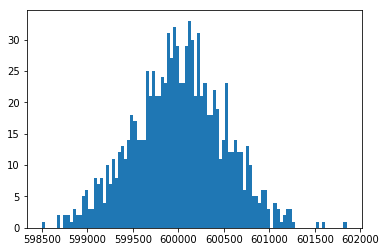

In [399]:
N = int(1e6) 
total = np.zeros(1000,)
for i in range(1000):
#     xx = np.random.uniform(1,2,N)
    xx = np.random.binomial(1,0.6,N)
    total[i] = np.sum(xx)
plt.hist(total,100)
plt.show()

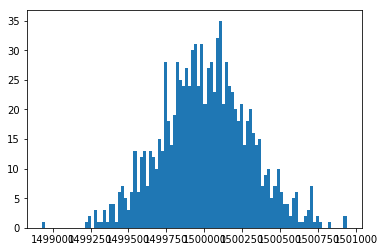

In [390]:
plt.hist(total,100)
plt.show()

In [398]:
res = np.random.binomial(1,0.4,12)
print(res)

[0 0 0 0 1 0 0 0 1 1 0 1]


## Classification, Naive Bayes, Gaussian Models

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


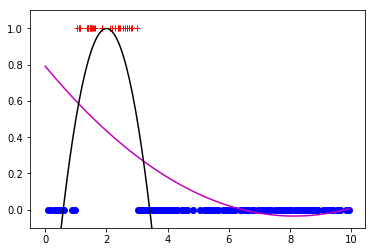

In [3]:

# Train model on synthetic dataset
N = 200
X = np.random.rand(N, 1)*10
yy = (X > 1) & (X < 3)

def phi_fn(X):
    return np.concatenate([np.ones((X.shape[0],1)), X, X**2], axis=1)
ww = np.linalg.lstsq(phi_fn(X), yy)[0]

# Predictions
x_grid = np.arange(0, 10, 0.05)[:,None]
f_grid = np.dot(phi_fn(x_grid), ww)

# Predictions with alternative weights:
w2 = [-1, 2, -0.5] # Values set by hand
f2_grid = np.dot(phi_fn(x_grid), w2)

# Show demo
plt.clf()
plt.plot(X[yy==1], yy[yy==1], 'r+')
plt.plot(X[yy==0], yy[yy==0], 'bo')
plt.plot(x_grid, f_grid, 'm-')
plt.plot(x_grid, f2_grid, 'k-')
plt.ylim([-0.1, 1.1])
plt.show()

[[-0.01993433]]


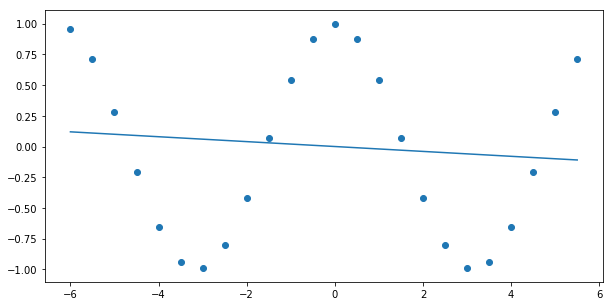

In [12]:
data = np.arange(-6,6,0.5).reshape(24,1)
targets = np.cos(data)
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,1,1)
res = fit_lnsq(data,targets)
print_results(ax1,targets,data,res,24)

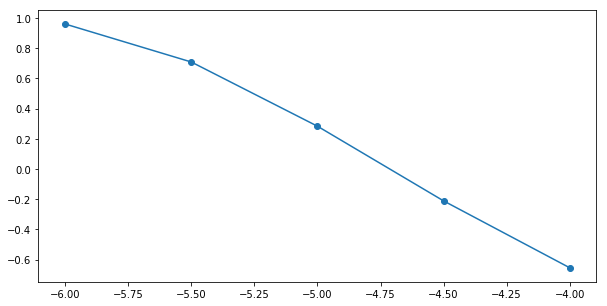

In [31]:
data = np.arange(-6,6,0.5).reshape(24,1)
targets = np.cos(data)
fig = plt.figure(figsize=(10,5))
design = rbf_design_matrix(data)
ax1 = plt.subplot(1,1,1)
res = solve_equation(design[0:5,:],targets[0:5])
print_results(ax1,targets[0:5],design[0:5,:],res,6)

## Bayesian Inference

In [16]:
import numpy as np
import matplotlib.pyplot as plt
m = np.random.normal(loc=0,scale=0.4)
print(m)

-0.0635888169997


In [17]:
post = np.random.normal(loc=m,scale=0.4,size=(12,1))

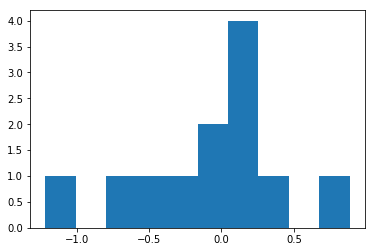

In [18]:
plt.hist(post)
plt.show()